In [1]:
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
from func import *

In [6]:
df = pd.read_csv("bbox_df_with_metric.csv")
print(df.shape)
print(df.columns)
df.head()

(104125, 9)
Index(['image_file', 'bbox', 'bbox_score', 'bbox_id', 'width', 'height',
       'size', 'entropy', 'laplacian'],
      dtype='object')


,image_file,bbox,bbox_score,bbox_id,width,height,size,entropy,laplacian
0,val2017/000000532481.jpg,"[249.8199079291458, 175.21093805640606, 74.004...",0.999274,0,74.004194,55.626326,4116.581369,6.847388,11851.206457
1,val2017/000000532481.jpg,"[284.07836701140275, 370.43747059580454, 13.84...",0.983319,1,13.844298,17.429331,241.296844,6.820085,14014.663049
2,val2017/000000532481.jpg,"[244.05099093550018, 170.61324112294565, 74.56...",0.471152,2,74.563805,73.940382,5513.276229,6.884189,11307.883659
3,val2017/000000532481.jpg,"[285.7852415208732, 370.21400193144893, 10.915...",0.427866,3,10.915034,14.482651,158.078634,6.444467,15793.261786
4,val2017/000000532481.jpg,"[254.66838783379924, 177.22587387050734, 65.52...",0.212189,4,65.529053,58.952817,3863.122282,6.836627,11993.799584


In [20]:
tmp = df.sort_values(by='bbox_score', ascending=False).reset_index(drop=True)

In [28]:
df['bbox_score'].describe()

count    1.041250e+05
mean     2.056417e-01
std      2.984736e-01
min      5.449207e-21
25%      7.503582e-03
50%      6.109473e-02
75%      2.850971e-01
max      9.999975e-01
Name: bbox_score, dtype: float64

<Axes: title={'center': '전체 score 분포'}>

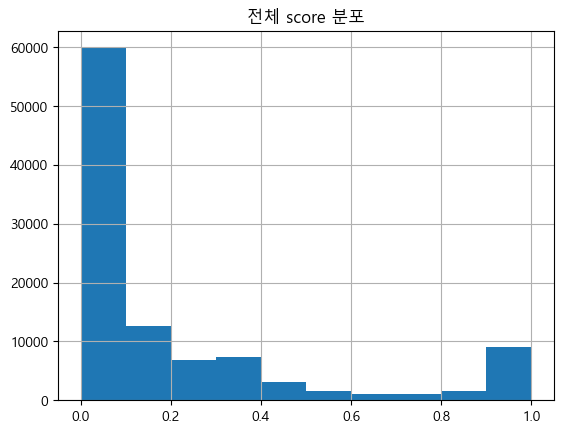

In [49]:
# score 분포
plt.title("전체 score 분포")
tmp['bbox_score'].hist()

<Axes: >

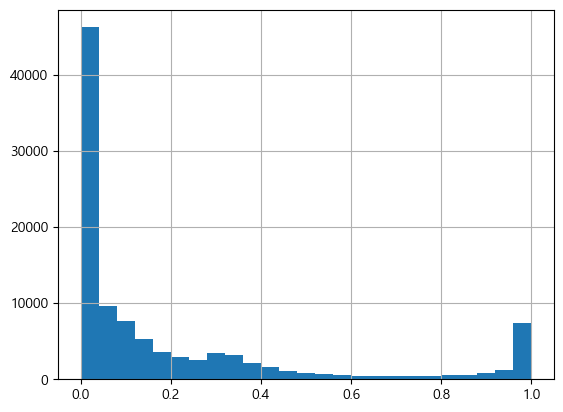

In [76]:
tmp['bbox_score'].hist(bins=25)

임의 thr
- low score < 0.08
- high score > 0.96

In [96]:
high_score = tmp[tmp['bbox_score']>0.96]
low_score = tmp[tmp['bbox_score']<0.04]

In [97]:
print(len(low_score))
print(len(high_score))
print(len(tmp))

46243
7359
104125


## 1. Entropy

<Axes: title={'center': '전체 score 정렬 bbox'}>

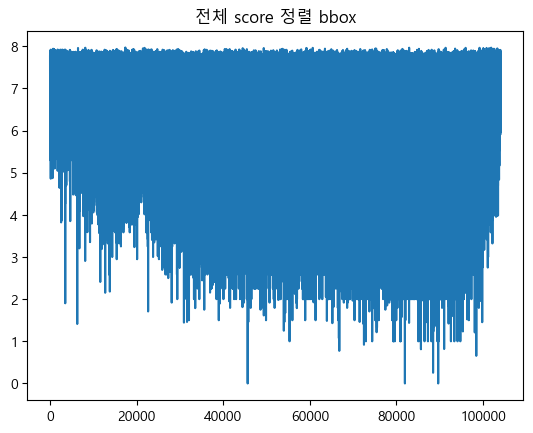

In [93]:
plt.title("전체 score 정렬 bbox")
tmp['entropy'].plot()

<Axes: title={'center': 'high_score'}, xlabel='score 정렬 bbox', ylabel='entropy'>

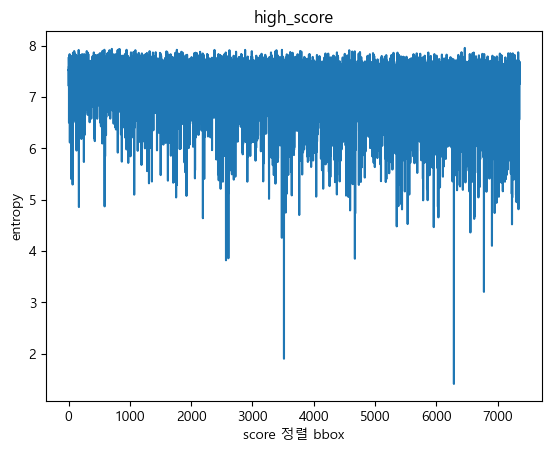

In [94]:
plt.title("high_score")
plt.xlabel("score 정렬 bbox")
plt.ylabel("entropy")
high_score['entropy'].plot()

<Axes: title={'center': 'low_score'}, xlabel='score 정렬 bbox', ylabel='entropy'>

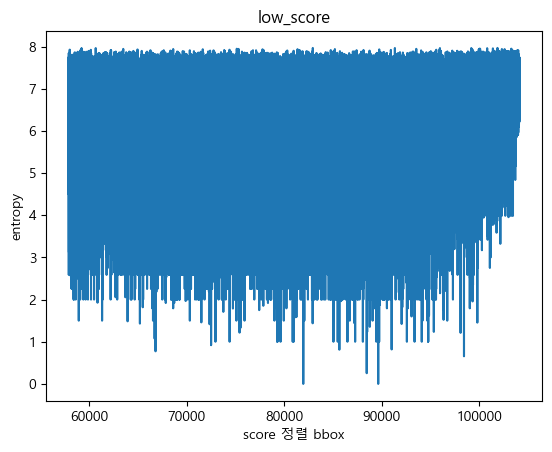

In [98]:
plt.title("low_score")
plt.xlabel("score 정렬 bbox")
plt.ylabel("entropy")
low_score['entropy'].plot()

- score 0.9 초과의 high score에서 높은 entropy를 가지는 것처럼 보임
- score 0.1 미만의 low score에서 낮은 entropy를 가지는 것처럼 보임

-> 데이터의 개수가 너무 많아서 경향이 있어보이나 -> 범위 나눠서 통계로 확인해보자

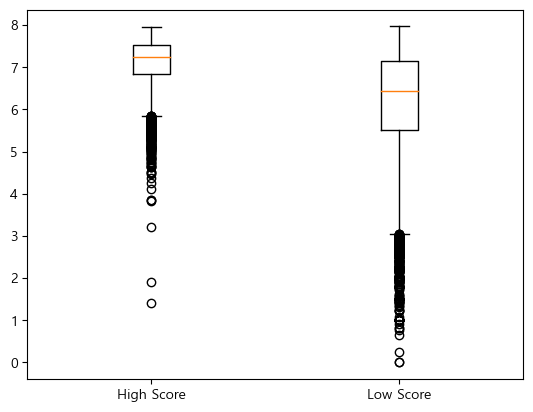

In [137]:
plt.boxplot([high_score['entropy'], low_score['entropy']], labels=['High Score', 'Low Score'])
plt.show()

In [103]:
tmp['entropy'].describe()

count    1.041250e+05
mean     6.440672e+00
std      1.098782e+00
min     -1.442695e-10
25%      5.871791e+00
50%      6.721044e+00
75%      7.276696e+00
max      7.971349e+00
Name: entropy, dtype: float64

In [100]:
high_score['entropy'].describe()

count    7359.000000
mean        7.113629
std         0.560290
min         1.411059
25%         6.846240
50%         7.243207
75%         7.517866
max         7.959578
Name: entropy, dtype: float64

In [101]:
low_score['entropy'].describe()

count    4.624300e+04
mean     6.193307e+00
std      1.212175e+00
min     -1.442695e-10
25%      5.506602e+00
50%      6.448236e+00
75%      7.149809e+00
max      7.966855e+00
Name: entropy, dtype: float64

## 2. sharpness - Laplacian

<Axes: title={'center': '(score 정렬) 전체 bbox laplacian'}>

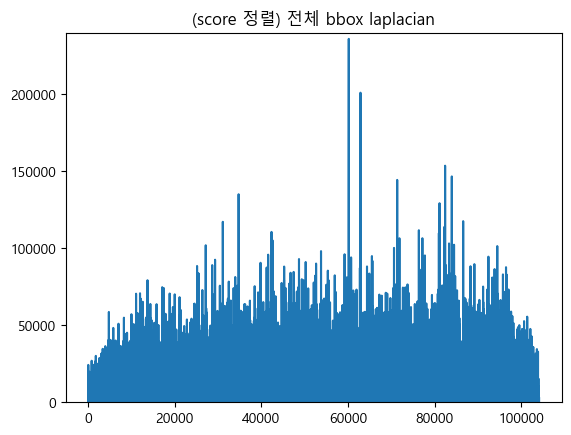

In [135]:
plt.title("(score 정렬) 전체 bbox laplacian")
plt.ylim(0,240000)
tmp['laplacian'].plot()

<Axes: title={'center': 'high_score'}, xlabel='score 정렬 bbox', ylabel='laplacian'>

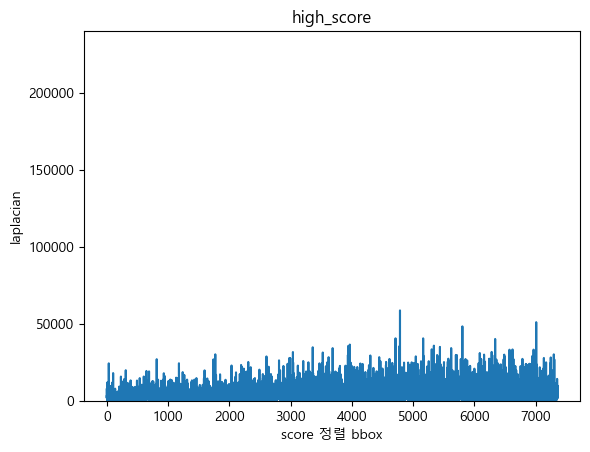

In [128]:
plt.title("high_score의 laplacian")
plt.xlabel("score 정렬 bbox")
plt.ylabel("laplacian")
plt.ylim(0,240000)
high_score['laplacian'].plot()

<Axes: title={'center': 'low_score의 laplacian'}, xlabel='score 정렬 bbox', ylabel='laplacian'>

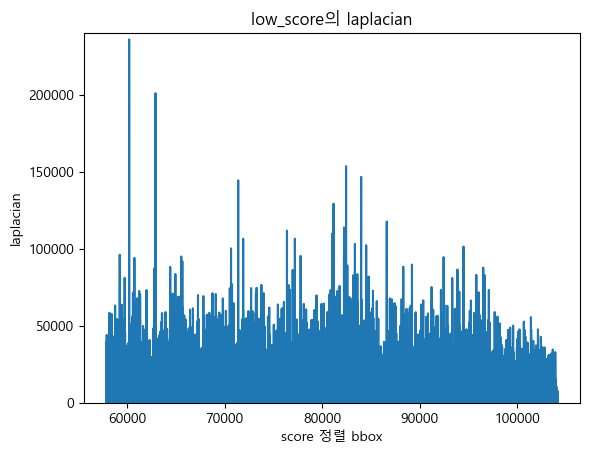

In [134]:
plt.title("low_score의 laplacian")
plt.xlabel("score 정렬 bbox")
plt.ylabel("laplacian")
plt.ylim(0,240000)
low_score['laplacian'].plot()

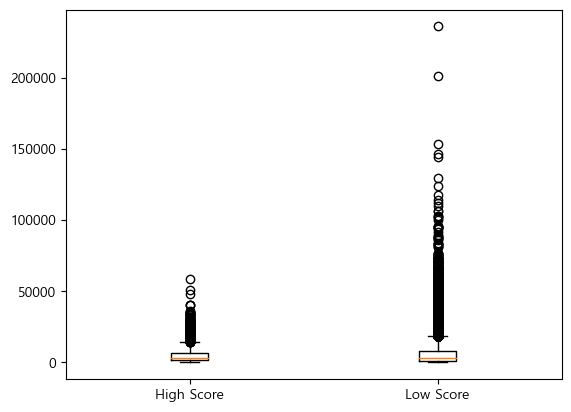

In [138]:
plt.boxplot([high_score['laplacian'], low_score['laplacian']], labels=['High Score', 'Low Score'])
plt.show()

In [144]:
print(np.mean(high_score['laplacian']))
print(np.mean(low_score['laplacian']))
print(np.mean(tmp['laplacian']))

5056.375139755507
6423.095177667413
6962.567889150977


In [ ]:
# 이미지 읽기
image = cv2.imread('val2017/000000532481.jpg', cv2.IMREAD_GRAYSCALE)
print("shape", image.shape)
plt.axis(False)
plt.imshow(image, cmap="gray")